In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input #

In [2]:
file = "./length.csv"
outlier_length_threshold = 2000
outlier_views_threshold = 20000000

# Main #

In [14]:
df_main = pd.read_csv(file)

In [15]:
df_main = df_main[['video_id', 'views', 'likes', 'dislikes', 'comment_count', 'hour', 'min', 'sec']]

In [16]:
secs = df_main['sec'].values
mins = df_main['min'].values
hours = df_main['hour'].values
total_time = [s+60*m+3600*h for s,m,h in zip(secs, mins, hours)]
df_main['total_time'] = total_time

In [19]:
# remove outliers and invalid lengths
df_main = df_main[((df_main['total_time'].values)>0)]
df = df_main[((df_main['total_time'].values)<outlier_length_threshold)]
df_500 = df_main[((df_main['views'].values)<outlier_views_threshold)]
df_500 = df_500[df_500['total_time']<outlier_length_threshold]

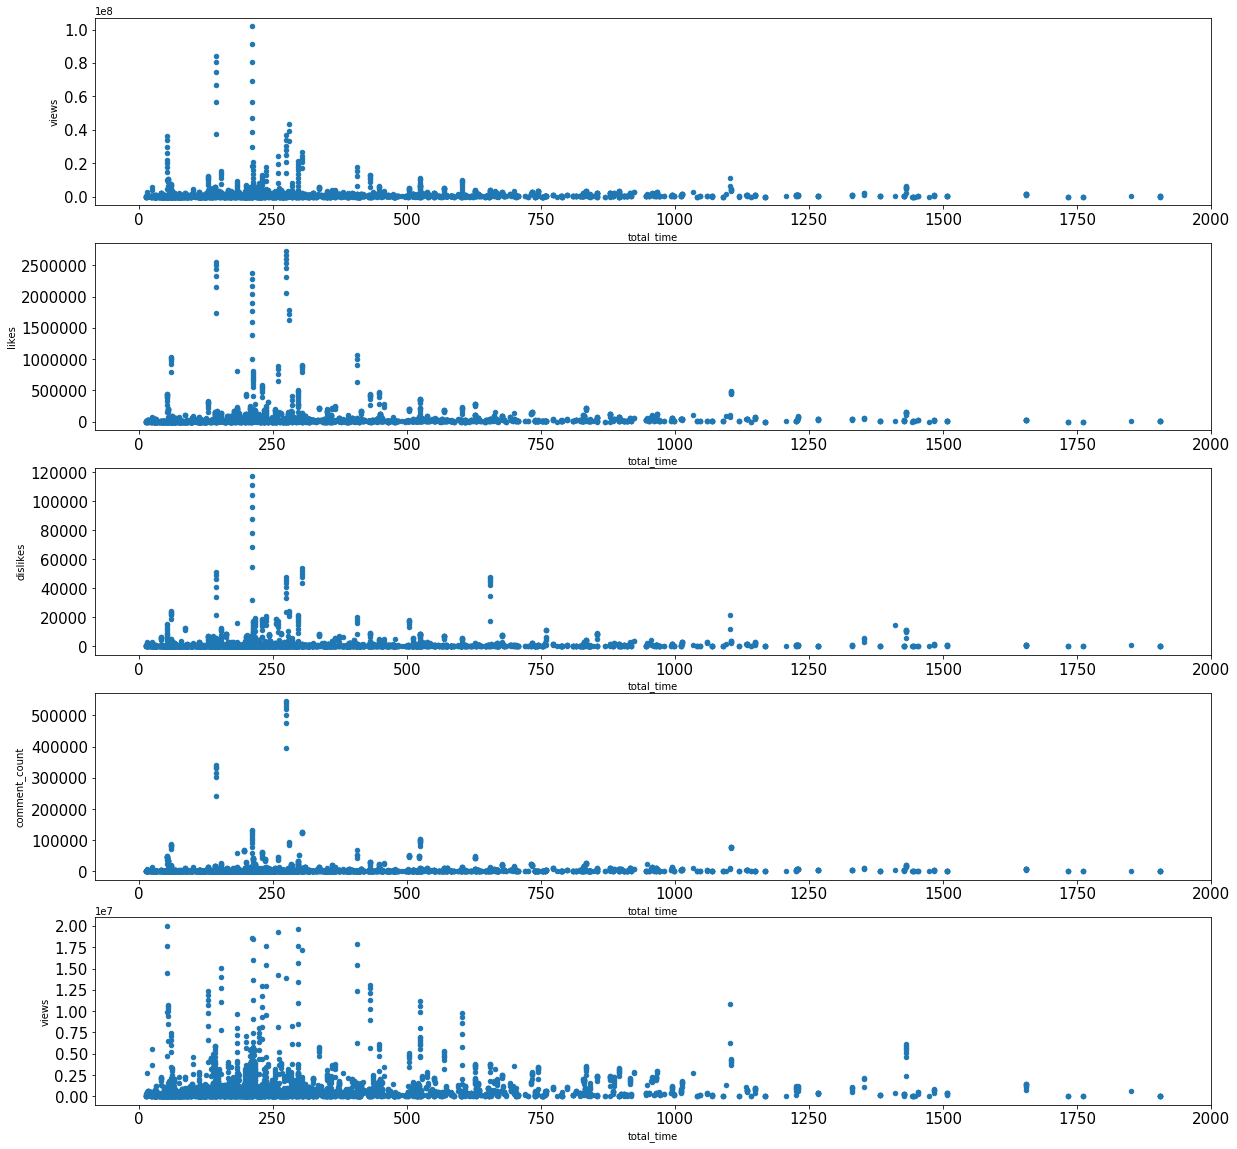

In [20]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (20,20))
df.plot(kind = 'scatter', x='total_time', y='views', ax = axes[0], fontsize = 15)
df.plot(kind = 'scatter', x='total_time', y='likes', ax = axes[1], fontsize = 15)
df.plot(kind = 'scatter', x='total_time', y='dislikes', ax = axes[2], fontsize = 15)
df.plot(kind = 'scatter', x='total_time', y='comment_count', ax = axes[3], fontsize = 15)
df_500.plot(kind = 'scatter', x='total_time', y='views', ax = axes[4], fontsize = 15)

1. No Observable linear relationship between length and any of the features. 
2. Downsizing the sample does not give obvious linear relationship 

In [21]:
df_main.head()

,video_id,views,likes,dislikes,comment_count,hour,min,sec,total_time
0,2kyS6SvSYSE,748374.0,57527.0,2966.0,15954.0,0,11,18,678
1,1ZAPwfrtAFY,2418783.0,97185.0,6146.0,12703.0,0,23,51,1431
2,5qpjK5DgCt4,3191434.0,146033.0,5339.0,8181.0,0,9,29,569
3,puqaWrEC7tY,343168.0,10172.0,666.0,2146.0,0,7,10,430
4,d380meD0W0M,2095731.0,132235.0,1989.0,17518.0,0,12,13,733
